In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from IPython.display import clear_output

In [2]:
df=pd.read_csv('SuperConductivity.csv')

In [3]:
df.columns

Index(['number_of_elements', 'mean_atomic_mass', 'wtd_mean_atomic_mass',
       'gmean_atomic_mass', 'wtd_gmean_atomic_mass', 'entropy_atomic_mass',
       'wtd_entropy_atomic_mass', 'range_atomic_mass', 'wtd_range_atomic_mass',
       'std_atomic_mass', 'wtd_std_atomic_mass', 'mean_fie', 'wtd_mean_fie',
       'gmean_fie', 'wtd_gmean_fie', 'entropy_fie', 'wtd_entropy_fie',
       'range_fie', 'wtd_range_fie', 'std_fie', 'wtd_std_fie',
       'mean_atomic_radius', 'wtd_mean_atomic_radius', 'gmean_atomic_radius',
       'wtd_gmean_atomic_radius', 'entropy_atomic_radius',
       'wtd_entropy_atomic_radius', 'range_atomic_radius',
       'wtd_range_atomic_radius', 'std_atomic_radius', 'wtd_std_atomic_radius',
       'mean_Density', 'wtd_mean_Density', 'gmean_Density',
       'wtd_gmean_Density', 'entropy_Density', 'wtd_entropy_Density',
       'range_Density', 'wtd_range_Density', 'std_Density', 'wtd_std_Density',
       'mean_ElectronAffinity', 'wtd_mean_ElectronAffinity',
       'gmean_

In [5]:
target=df['critical_temp']
target=np.array(target)
target=target.reshape(1,len(target))
target.shape

(1, 21263)

In [6]:
features=df.drop('critical_temp',axis=1).copy()
features=np.array(features)
features.shape


(21263, 81)

In [22]:
p=np.random.randint(1,20,81)

In [24]:
p=p.reshape(81,1)


In [25]:
features=features/features.max()
target=target/target.max()


In [40]:

def curve(m,x,c):
    return np.dot(m,(x.T)**p)+c
def error(m,x,c,y):
    return np.mean((curve(m,x,c)-y)**2)
def der_slope(m,x,c,y):
    return 2*np.mean((np.multiply((curve(m,x,c)-y),x.T**p)),axis=1)
def der_int(m,x,c,y):
    return 2*np.mean(curve(m,x,c)-y)


error: 0.2122099859739714
iteration : 999


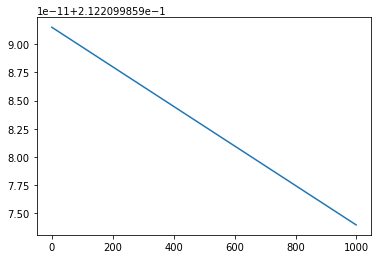

In [42]:
m=abs(np.random.randn(1,81))
c=abs(random.random())
it=1000
lr=0.0000000000001
cost=[]
for i in range(it):
    m=m-lr*der_slope(m,features,c,target)
    c=c-lr*der_int(m,features,c,target)
    cost.append(error(m,features,c,target))
    clear_output(True)
    print('error:',error(m,features,c,target))
    print('iteration :',i)
plt.plot(cost)
plt.show()

In [43]:
curve(m,features,c)

array([[0.26491285, 0.28740047, 0.26629241, ..., 0.53584217, 0.51217373,
        0.34498307]])

In [44]:
target

array([[0.15675676, 0.14054054, 0.1027027 , ..., 0.0107027 , 0.00994595,
        0.06918919]])